In [ ]:
!pip install tensorflow scikit-learn
!pip install keras
!pip install tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the CSV dataset
dataset_path = 'Dataset.csv'
df = pd.read_csv(dataset_path)
df.head()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,...,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
0,183,185,193,220,220,226,222,221,158,122,...,112,112,112,113,121,213,228,229,229,1
1,20,14,9,8,9,10,9,8,6,5,...,230,230,230,230,230,229,229,229,229,1
2,7,8,10,12,14,17,17,16,13,8,...,229,229,229,229,229,229,229,229,229,1
3,26,22,17,14,12,11,11,11,10,9,...,232,232,232,232,232,232,232,232,232,1
4,63,52,25,15,14,5,8,5,9,8,...,90,101,106,110,112,113,115,116,116,1


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,...,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
0,14,11,8,8,11,17,21,24,16,4,...,233,232,232,232,232,232,232,232,232,1
1,177,189,201,205,214,239,247,255,254,255,...,231,238,162,110,186,229,215,197,189,4
2,142,139,142,112,49,35,31,18,14,13,...,152,155,154,155,155,155,155,155,155,5
3,224,244,255,255,255,254,252,255,255,251,...,41,39,43,105,234,240,236,229,226,4
4,174,179,177,173,178,174,177,176,171,131,...,179,178,178,177,177,177,176,175,175,6


In [4]:
# Split features and labels
X = df.drop('class', axis=1).values
y = df['class'].values

In [5]:
print(X)

[[ 14  11   8 ... 232 232 232]
 [177 189 201 ... 215 197 189]
 [142 139 142 ... 155 155 155]
 ...
 [177 175 175 ... 122 124 117]
 [225 222 217 ... 215 222 216]
 [ 14  10   8 ... 232 232 232]]


In [6]:
print(y)

[1 4 5 ... 4 4 1]


In [7]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Reshape and normalize the features
X_train = X_train.reshape(-1, 100, 100, 1) / 255.0
X_test = X_test.reshape(-1, 100, 100, 1) / 255.0

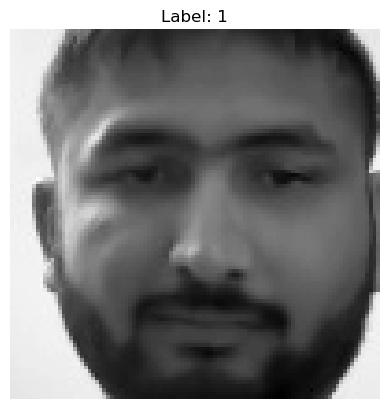

In [22]:
# Choose a random index
random_index = random.randint(0, len(X) - 1)

# Display the corresponding image
plt.imshow(X[random_index].reshape(100, 100), cmap='gray')
plt.title(f'Label: {y[random_index]}')
plt.axis('off')
plt.show()

In [23]:
# Define a Sequential model, which allows for linear stack of layers
model = tf.keras.models.Sequential([
    # Input layer with shape (100, 100, 1)
    tf.keras.layers.Input(shape=(100, 100, 1)),
    
    # Convolutional layer with 32 filters of size (3, 3) and ReLU activation function
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Max pooling layer with pool size (2, 2) and stride (2, 2)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Convolutional layer with 64 filters of size (3, 3) and ReLU activation function
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Max pooling layer with pool size (2, 2) and stride (2, 2)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten layer to flatten the input
    tf.keras.layers.Flatten(),
    
    # Dense (fully connected) layer with 128 units and ReLU activation function
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Dropout layer with dropout rate of 0.5 to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with 6 units and softmax activation function for classification
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Print the summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,286 (16.61 MB)

 Trainable params: 4,353,286 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate the image by a random angle within the range [-20, 20] degrees
    width_shift_range=0.1,  # Shift the image horizontally by a maximum of 10% of the total width
    height_shift_range=0.1, # Shift the image vertically by a maximum of 10% of the total height
    shear_range=0.2,        # Apply shear transformation with a maximum shear angle of 20 degrees
    zoom_range=0.2,         # Zoom into the image by a maximum factor of 1.2
    horizontal_flip=True,   # Flip the image horizontally with a probability of 50%
    fill_mode='nearest'     # Fill in newly created pixels after rotation or shifting
)

# Create augmented training data generator
augmented_datagen = datagen.flow(X_train, y_train)

# Train the model on the training data (X_train and y_train) for 20 epochs,
# while validating its performance on the test data (X_test and y_test)
history = model.fit(datagen.flow(X_train, y_train), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - accuracy: 0.1562 - loss: 1.8041

/Users/harshitgupta/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4369 - loss: 1.4890 - val_accuracy: 0.8754 - val_loss: 0.4668
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8470 - loss: 0.5040 - val_accuracy: 0.9496 - val_loss: 0.2412
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8906 - loss: 0.3717 - val_accuracy: 0.9496 - val_loss: 0.2109
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9204 - loss: 0.2927 - val_accuracy: 0.9555 - val_loss: 0.1326
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9349 - loss: 0.2292 - val_accuracy: 0.9555 - val_loss: 0.0951
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9475 - loss: 0.1626 - val_accuracy: 0.9792 - val_loss: 0.0972
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9233 - loss: 0.2056 - val_accuracy: 0.9674 - val_loss: 0.1091
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9594 - loss: 0.1287 - val_accuracy: 0.9763 - val_loss: 0.

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0230
Test Accuracy: 0.9910979270935059
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.95      0.98        22
           2       1.00      0.98      0.99        66
           3       0.98      0.99      0.98        93
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        50

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



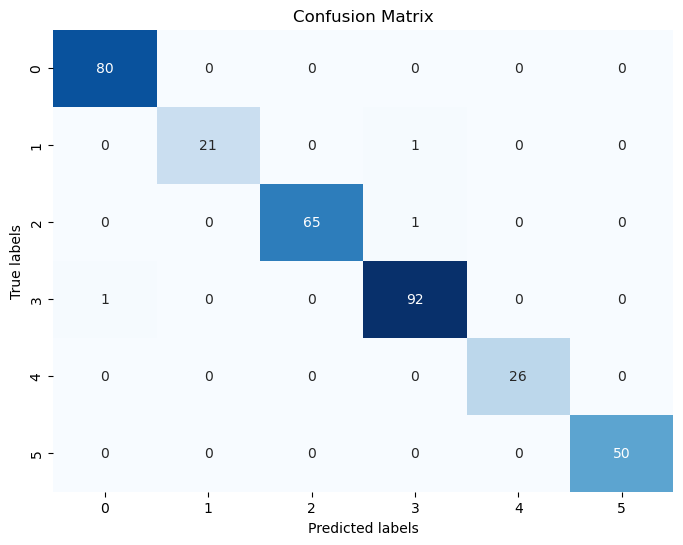

In [27]:
# Calculate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')  # Label for the x-axis representing predicted labels
plt.ylabel('True labels')  # Label for the y-axis representing true labels
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot


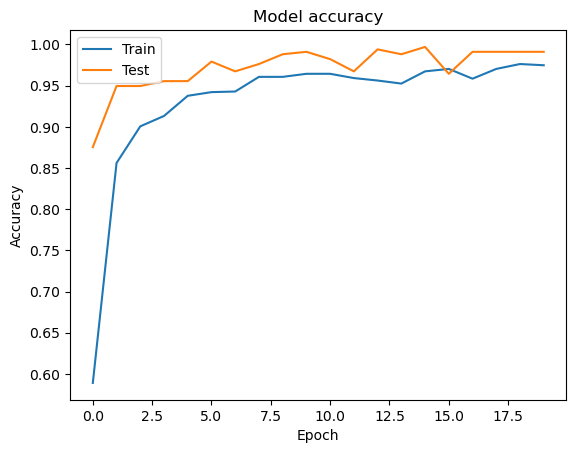

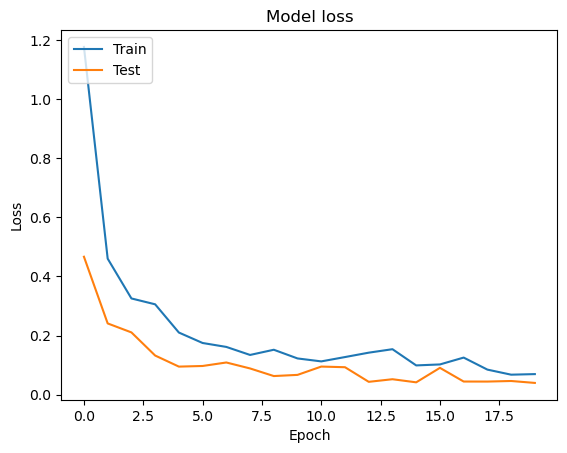

In [28]:
# Plot training & test accuracy values over epochs
plt.plot(history.history['accuracy'])  # Plot training accuracy
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy')  # Title of the plot
plt.ylabel('Accuracy')  # Label for the y-axis representing accuracy
plt.xlabel('Epoch')  # Label for the x-axis representing epochs
plt.legend(['Train', 'Test'], loc='upper left')  # Add legend for train and test accuracy
plt.show()  # Display the plot

# Plot training & test loss values over epochs
plt.plot(history.history['loss'])  # Plot training loss
plt.plot(history.history['val_loss'])  # Plot validation loss
plt.title('Model loss')  # Title of the plot
plt.ylabel('Loss')  # Label for the y-axis representing loss
plt.xlabel('Epoch')  # Label for the x-axis representing epochs
plt.legend(['Train', 'Test'], loc='upper left')  # Add legend for train and test loss
plt.show()  # Display the plot


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


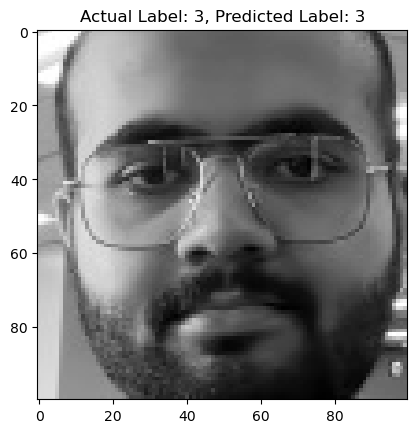

In [30]:
# Choose a random index from the test set
random_index = random.randint(0, len(X_test) - 1)

# Get the corresponding image, actual label, and predicted label
random_image = X_test[random_index]  # Select the image corresponding to the random index
actual_label = y_test[random_index]  # Get the actual label of the selected image
predicted_label = np.argmax(model.predict(random_image.reshape(1, 100, 100, 1)), axis=-1)  # Predict the label of the image using the model

# Display the image along with its actual and predicted labels
plt.imshow(random_image.reshape(100, 100), cmap='gray')  # Plot the image
plt.title(f'Actual Label: {actual_label}, Predicted Label: {predicted_label[0]}')  # Set title with actual and predicted labels
plt.axis('on')  # Turn on axis
plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


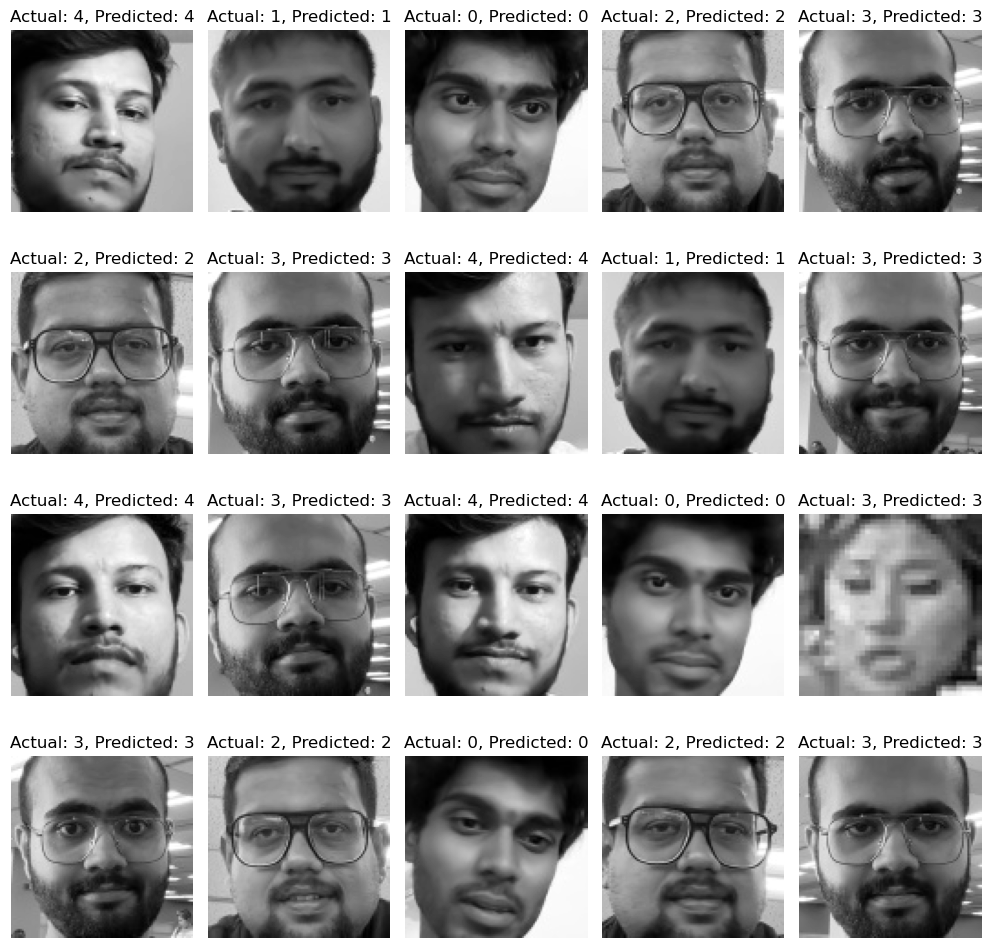

In [31]:
def plot_images_with_predictions(model, X_test, y_test, num_images=20, grid_size=(4, 5)):
    # Generate random indices for selecting images
    random_indices = random.sample(range(len(X_test)), num_images)
    
    # Create subplots
    fig, axes = plt.subplots(*grid_size, figsize=(10, 10))
    
    # Flatten axes if grid_size is 1x1
    if grid_size == (1, 1):
        axes = np.array([axes])
    
    # Loop through the random indices and plot images with predictions
    for i, idx in enumerate(random_indices):
        # Get image, actual label, and predicted label
        image = X_test[idx]
        actual_label = y_test[idx]
        predicted_label = np.argmax(model.predict(image.reshape(1, 100, 100, 1)), axis=-1)[0]
        
        # Plot the image
        row = i // grid_size[1]
        col = i % grid_size[1]
        axes[row, col].imshow(image.reshape(100, 100), cmap='gray')
        axes[row, col].set_title(f'Actual: {actual_label}, Predicted: {predicted_label}')
        axes[row, col].axis('off')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Usage example
plot_images_with_predictions(model, X_test, y_test)